Importing the necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Any results you write to the current directory are saved as output.

Let's look at the data. 

In [2]:
train=pd.DataFrame(pd.read_csv('./mushrooms.csv'))
train.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Renaming the columns 

In [3]:
train.columns=['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat']

Checking for missing values

In [4]:
train.head(5)
train.isna().sum()
#train['stalk-root'].unique()


class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [5]:
train.dtypes

class                       object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

Let's map Categorical variables

In [6]:
mapping=[{'e':1,'p':0},
         {'b':0,'c':1,'x':2,'f':3, 'k':4,'s':5},
         {'f':0,'g':1,'y':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9},
         {'t':1,'f':0},
         {'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':0,'p':7,'s':8},
         {'a':0,'d':1, 'f':2, 'n':3},
         {'c':0,'w':1,'d':2},
         {'b':0,'n':1},
         {'k':0,'n':1,'b':2,'h':3,'g':4,'r':5,'o':6,'p':7,'u':8,'e':9,'w':10,'y':11},
         {'e':0,'t':1},{'b':0,'c':1,'u':2,'e':3,'z':4,'r':5,'?':6},
         {'f':0,'y':1,'k':2,'s':3},
         {'f':0,'y':1,'k':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':5,'w':6,'y':7},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':6,'w':7,'y':8},
         {'p':0,'u':1},
         {'n':0,'o':1,'w':2,'y':3},
         {'n':0,'o':1,'t':2},
         {'c':4,'e':1,'f':2,'l':3,'n':0,'p':5,'s':6,'z':7},
         {'k':0,'n':1,'b':2,'h':3,'r':4,'o':5,'u':6,'w':7,'y':8},
         {'a':0,'c':1,'n':2,'s':3,'v':4,'y':5},
         {'g':0,'l':1,'m':2,'p':3,'u':4,'w':5,'d':6}]
len(mapping),len(train.columns)

(23, 23)

In [7]:
for i in range(len(train.columns)):
    train[train.columns[i]]=train[train.columns[i]].map(mapping[i]).astype(int)


Data types have changed from object to int

In [8]:
train.shape

(8124, 23)

Separating depend varible from predictors and splitting the dataset

In [9]:
x=train.iloc[:,1:]
y=train.iloc[:,0]
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)

Linear SVM

In [10]:
svm = SVC(kernel='linear',random_state=0)
svm.fit(x_tr,y_tr)
ysvc_pred=svm.predict(x_ts)
accuracy_score(y_ts,ysvc_pred),confusion_matrix(y_ts,ysvc_pred)


(0.9932307692307693, array([[779,   6],
        [  5, 835]]))

Kernel SVM

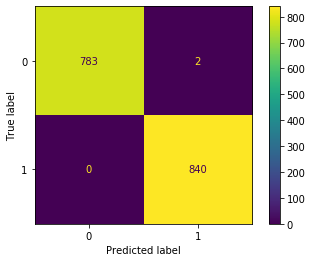

In [11]:
kersvm=SVC(kernel='rbf',random_state=0)
kersvm.fit(x_tr,y_tr)
yksvm_pred=kersvm.predict(x_ts)
accuracy_score(y_ts,yksvm_pred)

cm = confusion_matrix(y_ts,yksvm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Naive Bayes

In [17]:
gnb=GaussianNB()
gnb.fit(x_tr,y_tr)

ygnb_pred=gnb.predict(x_ts)
accuracy_score(y_ts,ygnb_pred)
cm = confusion_matrix(y_ts,ygnb_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

AttributeError: 'GaussianNB' object has no attribute 'summary'

Random Forest

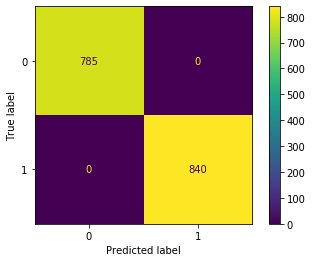

In [13]:
rf=RandomForestClassifier(random_state=0,n_estimators=100)
rf.fit(x_tr,y_tr)
yrf_pred=rf.predict(x_ts)
accuracy_score(y_ts,yrf_pred)
cm = confusion_matrix(y_ts,yrf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

For the task submission , Using ANN

In [14]:
model = Sequential([
    layers.Dense(22, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

epochs = 20

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr,epochs=epochs, validation_data=(x_ts, y_ts))
model.summary()


Epoch 1/20
204/204 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9280 - val_loss: 0.0830 - val_accuracy: 0.9735
Epoch 2/20
204/204 [==============================] - 0s 795us/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.0527 - val_accuracy: 0.9785
Epoch 3/20
204/204 [==============================] - 0s 830us/step - loss: 0.0365 - accuracy: 0.9855 - val_loss: 0.0404 - val_accuracy: 0.9834
Epoch 4/20
204/204 [==============================] - 0s 811us/step - loss: 0.0249 - accuracy: 0.9905 - val_loss: 0.0279 - val_accuracy: 0.9865
Epoch 5/20
204/204 [==============================] - 0s 812us/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0302 - val_accuracy: 0.9852
Epoch 6/20
204/204 [==============================] - 0s 815us/step - loss: 0.0119 - accuracy: 0.9975 - val_loss: 0.0124 - val_accuracy: 0.9957
Epoch 7/20
204/204 [==============================] - 0s 791us/step - loss: 0.0088 - accuracy: 0.9988 - val_loss: 0.0094 - val_accuracy: 0

In [21]:
classifier=Sequential()
classifier.add(Dense(64,activation='relu',input_dim=22))
#classifier.add(Dense(output_dim=1,init='uniform',activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = classifier.fit(x_tr,y_tr,batch_size=10,epochs=100, validation_data=(x_ts, y_ts))

Epoch 1/100
650/650 [==============================] - 1s 816us/step - loss: 0.1201 - accuracy: 0.9640 - val_loss: 0.0480 - val_accuracy: 0.9797
Epoch 2/100
650/650 [==============================] - 0s 676us/step - loss: 0.0324 - accuracy: 0.9878 - val_loss: 0.0263 - val_accuracy: 0.9871
Epoch 3/100
650/650 [==============================] - 0s 694us/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0147 - val_accuracy: 0.9938
Epoch 4/100
650/650 [==============================] - 0s 698us/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 5/100
650/650 [==============================] - 0s 697us/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0060 - val_accuracy: 0.9988
Epoch 6/100
650/650 [==============================] - 0s 703us/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 7/100
650/650 [==============================] - 0s 692us/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0043 - val_ac

650/650 [==============================] - 0s 732us/step - loss: 4.8607e-04 - accuracy: 0.9998 - val_loss: 6.8640e-06 - val_accuracy: 1.0000
Epoch 56/100
650/650 [==============================] - 0s 724us/step - loss: 2.7093e-06 - accuracy: 1.0000 - val_loss: 5.8705e-06 - val_accuracy: 1.0000
Epoch 57/100
650/650 [==============================] - 0s 730us/step - loss: 2.2846e-06 - accuracy: 1.0000 - val_loss: 4.3631e-06 - val_accuracy: 1.0000
Epoch 58/100
650/650 [==============================] - 0s 736us/step - loss: 1.9784e-06 - accuracy: 1.0000 - val_loss: 3.6653e-06 - val_accuracy: 1.0000
Epoch 59/100
650/650 [==============================] - 0s 720us/step - loss: 1.7299e-06 - accuracy: 1.0000 - val_loss: 3.8215e-06 - val_accuracy: 1.0000
Epoch 60/100
650/650 [==============================] - 0s 745us/step - loss: 1.5724e-06 - accuracy: 1.0000 - val_loss: 3.3282e-06 - val_accuracy: 1.0000
Epoch 61/100
650/650 [==============================] - 0s 734us/step - loss: 1.4510e-06 

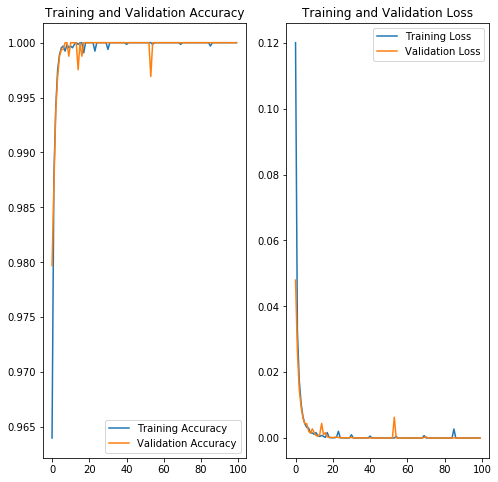

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

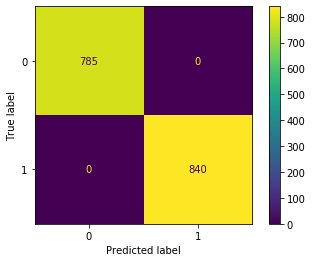

In [16]:
y_pred=model.predict(x_ts)
y_pred=y_pred>0.5

cm = confusion_matrix(y_ts, y_pred)  

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

The unmaaping can be done in the same using dictonaries . This shows how simple encoding helps model predict give accurate results. If you found this helpful do upvote.  Thanks in advance !. 